<AxesSubplot:>

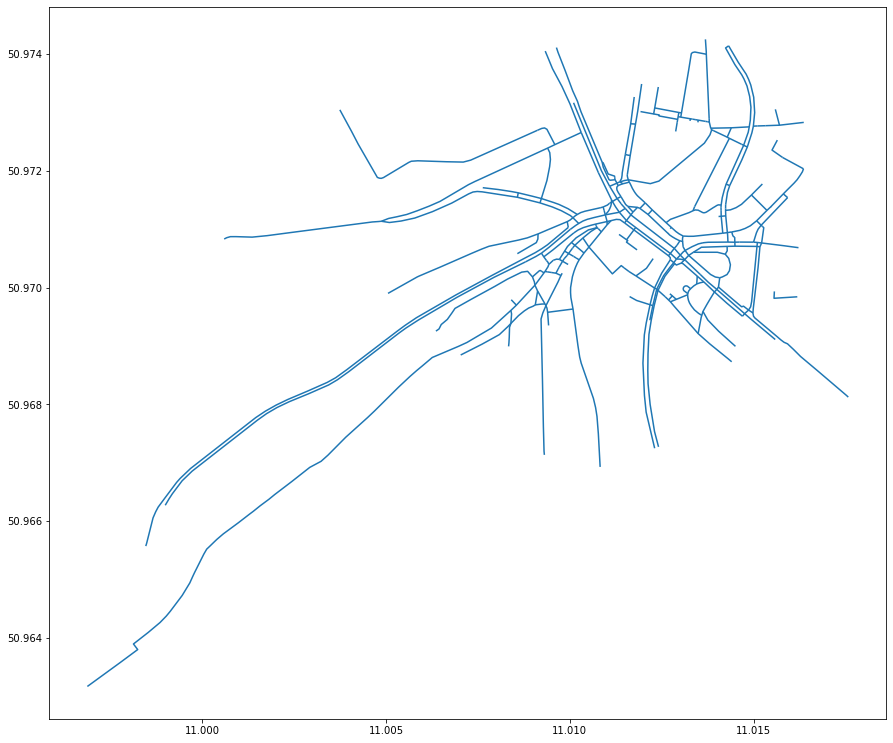

In [1]:
# WGS84 Latitude/Longitude: "EPSG:4326"
    # 
    # UTM Zones (North): "EPSG:32633"
    # 
    # UTM Zones (South): "EPSG:32733"
    
    #https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# street_map = gpd.read_file("D:\\Digital Engineering\\Courses\\Wi21-22\\Traffic data simulation\\Gothaer Platzt Model\\Infrastructure\\untitled\\Roads\\roads.shp")
file = os.listdir("data/GothaerPlatzShpFiles")
path = [os.path.join("data/GothaerPlatzShpFiles", i) for i in file if "roads-line.shp" in i]
G = gpd.GeoDataFrame(pd.concat([gpd.read_file(i) for i in path],ignore_index=True), crs=gpd.read_file(path[0]).crs)

gothaer_platz = G

fig,ax = plt.subplots(figsize = (15,15))

gothaer_platz.plot(ax = ax)



In [2]:
from shapely.geometry import Point, Polygon
df = pd.read_csv("data/Detektordaten Erfurt.csv")
crs = {"init": "epsg:4326"}
df.head()

,Name,Nummer,Fahrstreifen,Anzahl Fahrstreifen,Richtung,Aktivierung Modell,Typ,Latitude,Longitude
0,EF_LSA_K251_D001_IS1_1,10025101,1,1,R,nein,LSA,50.971541,11.011033
1,EF_LSA_K251_D002_IS1,10025102,1,1,R,ja,LSA,50.971671,11.010909
2,EF_LSA_K251_D003_IS2,10025103,2,1,G,ja,LSA,50.971687,11.010948
3,EF_LSA_K251_D004_IS3,10025104,3,1,G,ja,LSA,50.971704,11.011001
4,EF_LSA_K251_D008_IS7,10025108,1,1,R,ja,LSA,50.971045,11.010398


In [3]:
geometry = [Point(xy) for xy in zip(df["Longitude"],df["Latitude"])]
geo_df = gpd.GeoDataFrame(df,#specify our data
crs = crs, # specify our coordinate system
geometry= geometry) # specify the geometry list we created
geo_df.head()

D:\program files\Anaconda\envs\Python-Anaconda-Vissim\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Name,Nummer,Fahrstreifen,Anzahl Fahrstreifen,Richtung,Aktivierung Modell,Typ,Latitude,Longitude,geometry
0,EF_LSA_K251_D001_IS1_1,10025101,1,1,R,nein,LSA,50.971541,11.011033,POINT (11.01103 50.97154)
1,EF_LSA_K251_D002_IS1,10025102,1,1,R,ja,LSA,50.971671,11.010909,POINT (11.01091 50.97167)
2,EF_LSA_K251_D003_IS2,10025103,2,1,G,ja,LSA,50.971687,11.010948,POINT (11.01095 50.97169)
3,EF_LSA_K251_D004_IS3,10025104,3,1,G,ja,LSA,50.971704,11.011001,POINT (11.01100 50.97170)
4,EF_LSA_K251_D008_IS7,10025108,1,1,R,ja,LSA,50.971045,11.010398,POINT (11.01040 50.97104)


D:\program files\Anaconda\envs\Python-Anaconda-Vissim\lib\site-packages\geopandas\plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


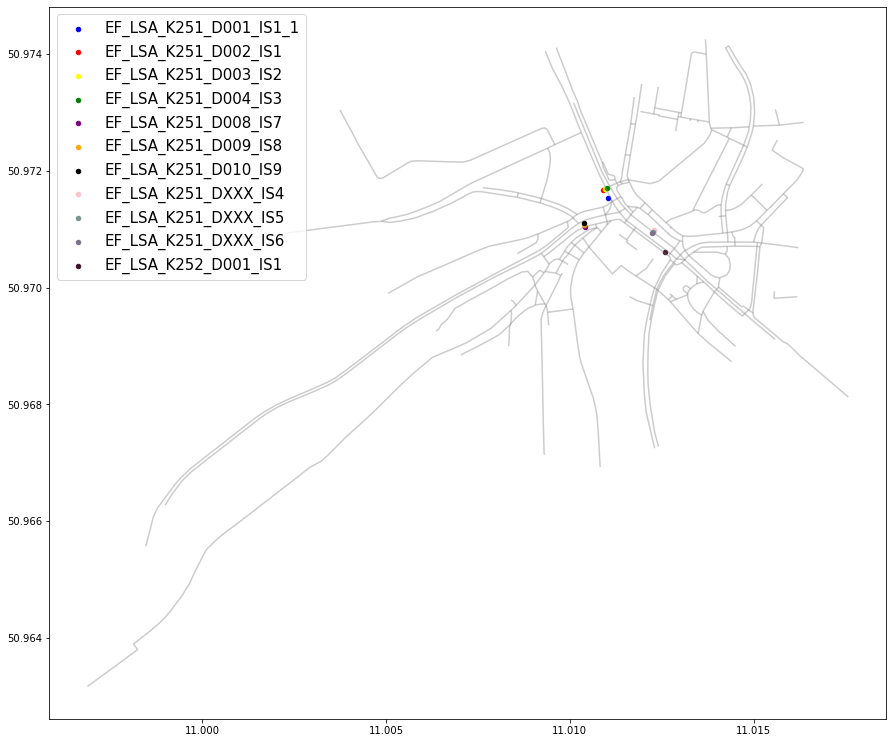

In [4]:
fig,ax = plt.subplots(figsize= (15,15))
gothaer_platz.plot(ax = ax, alpha= 0.4, color= "grey")
# points_plotted =geo_df.plot(ax = ax, color= "brown", markersize = 20)
# for x, y, label in zip(geo_df.geometry.x, geo_df.geometry.y, geo_df.Name):
#     points_plotted.annotate(label, xy=(x, y), xytext=(1, 1), textcoords="offset points")

geo_df[geo_df["Name"].str.strip() == "EF_LSA_K251_D001_IS1_1"].plot(ax = ax, color= "blue", markersize = 20,label = "EF_LSA_K251_D001_IS1_1",marker = "o")
geo_df[geo_df["Name"].str.strip() == "EF_LSA_K251_D002_IS1"].plot(ax = ax, color= "red", markersize = 20,label = "EF_LSA_K251_D002_IS1",marker = "o")
geo_df[geo_df["Name"].str.strip() == "EF_LSA_K251_D003_IS2"].plot(ax = ax, color= "yellow", markersize = 20,label = "EF_LSA_K251_D003_IS2",marker = "o")
geo_df[geo_df["Name"].str.strip() == "EF_LSA_K251_D004_IS3"].plot(ax = ax, color= "green", markersize = 20,label = "EF_LSA_K251_D004_IS3",marker = "o")
geo_df[geo_df["Name"].str.strip() == "EF_LSA_K251_D008_IS7"].plot(ax = ax, color= "purple", markersize = 20,label = "EF_LSA_K251_D008_IS7",marker = "o")
geo_df[geo_df["Name"].str.strip() == "EF_LSA_K251_D009_IS8"].plot(ax = ax, color= "orange", markersize = 20,label = "EF_LSA_K251_D009_IS8",marker = "o")
geo_df[geo_df["Name"].str.strip() == "EF_LSA_K251_D010_IS9"].plot(ax = ax, color= "black", markersize = 20,label = "EF_LSA_K251_D010_IS9",marker = "o")

geo_df[geo_df["Name"].str.strip() == "EF_LSA_K251_D010_IS10"].plot(ax = ax, color= "cyan", markersize = 20,label = "EF_LSA_K251_D010_IS10",marker = "o")
geo_df[geo_df["Name"].str.strip() == "EF_LSA_K251_D010_IS11"].plot(ax = ax, color= "#dda060", markersize = 20,label = "EF_LSA_K251_D010_IS11",marker = "o")
geo_df[geo_df["Name"].str.strip() == "EF_LSA_K251_DXXX_IS4"].plot(ax = ax, color= "#ffc0cb", markersize = 20,label = "EF_LSA_K251_DXXX_IS4",marker = "o")
geo_df[geo_df["Name"].str.strip() == "EF_LSA_K251_DXXX_IS5"].plot(ax = ax, color= "#779690", markersize = 20,label = "EF_LSA_K251_DXXX_IS5",marker = "o")
geo_df[geo_df["Name"].str.strip() == "EF_LSA_K251_DXXX_IS6"].plot(ax = ax, color= "#7b6f8e", markersize = 20,label = "EF_LSA_K251_DXXX_IS6",marker = "o")

geo_df[geo_df["Name"].str.strip() == "EF_LSA_K252_D001_IS1"].plot(ax = ax, color= "#440f2b", markersize = 20,label = "EF_LSA_K252_D001_IS1",marker = "o")

plt.legend(prop ={"size":15}, loc="upper left")
# plt.savefig("colored-sensors.jpg")


In [5]:
geo_df.to_file("data/induction loops/induction loops vector file.shp")




D:\program files\Anaconda\envs\Python-Anaconda-Vissim\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


In [6]:
geo_df

,Name,Nummer,Fahrstreifen,Anzahl Fahrstreifen,Richtung,Aktivierung Modell,Typ,Latitude,Longitude,geometry
0,EF_LSA_K251_D001_IS1_1,10025101,1,1,R,nein,LSA,50.971541,11.011033,POINT (11.01103 50.97154)
1,EF_LSA_K251_D002_IS1,10025102,1,1,R,ja,LSA,50.971671,11.010909,POINT (11.01091 50.97167)
2,EF_LSA_K251_D003_IS2,10025103,2,1,G,ja,LSA,50.971687,11.010948,POINT (11.01095 50.97169)
3,EF_LSA_K251_D004_IS3,10025104,3,1,G,ja,LSA,50.971704,11.011001,POINT (11.01100 50.97170)
4,EF_LSA_K251_D008_IS7,10025108,1,1,R,ja,LSA,50.971045,11.010398,POINT (11.01040 50.97104)
5,EF_LSA_K251_D009_IS8,10025109,2,1,L,ja,LSA,50.971068,11.010390,POINT (11.01039 50.97107)
6,EF_LSA_K251_D010_IS9,10025110,3,1,L,ja,LSA,50.971098,11.010385,POINT (11.01038 50.97110)
7,EF_LSA_K251_D011_IS10,10025111,1,1,R,nein,LSA,50.970821,11.009855,POINT (11.00985 50.97082)
8,EF_LSA_K251_D012_IS11,10025112,1,1,R,nein,LSA,50.970805,11.009816,POINT (11.00982 50.97080)
9,EF_LSA_K251_DXXX_IS4,10025105,1,1,G,nein,LSA,50.970982,11.012297,POINT (11.01230 50.97098)


In [12]:
df = pd.read_csv("D:\Digital Engineering\Courses\Wi21-22\Traffic data simulation\Gothaer Platzt Model\Infrastructure\Python-Anaconda-Vissim\data\pwpTMP_2021-11-19_14 31 10_Diagramm1.csv",sep='\t',encoding='latin-1')
df["Zeit"]

0      Thu Nov 11 2021 23:55:00 GMT+0100 (Mitteleurop...
1      Thu Nov 11 2021 23:50:00 GMT+0100 (Mitteleurop...
2      Thu Nov 11 2021 23:45:00 GMT+0100 (Mitteleurop...
3      Thu Nov 11 2021 23:40:00 GMT+0100 (Mitteleurop...
4      Thu Nov 11 2021 23:35:00 GMT+0100 (Mitteleurop...
                             ...                        
859    Tue Nov 09 2021 00:20:00 GMT+0100 (Mitteleurop...
860    Tue Nov 09 2021 00:15:00 GMT+0100 (Mitteleurop...
861    Tue Nov 09 2021 00:10:00 GMT+0100 (Mitteleurop...
862    Tue Nov 09 2021 00:05:00 GMT+0100 (Mitteleurop...
863    Tue Nov 09 2021 00:00:00 GMT+0100 (Mitteleurop...
Name: Zeit, Length: 864, dtype: object